# Изучение закономерностей, определяющих успешность игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла

Описание данных:  
***Name*** — название игры  
***Platform*** — платформа  
***Year_of_Release*** — год выпуска  
***Genre*** — жанр игры  
***NA_sales*** — продажи в Северной Америке (миллионы проданных копий)  
***EU_sales*** — продажи в Европе (миллионы проданных копий)  
***JP_sales*** — продажи в Японии (миллионы проданных копий)  
***Other_sales*** — продажи в других странах (миллионы проданных копий)  
***Critic_Score*** — оценка критиков (максимум 100)  
***User_Score*** — оценка пользователей (максимум 10)  
***Rating*** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('/datasets/games.csv')

In [ ]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4686,LEGO Dimensions,XOne,2015.0,Action,0.22,0.15,0.00,0.04,80.0,6.9,E10+
4606,NFL Blitz 2001,N64,2000.0,Sports,0.34,0.07,0.00,0.00,NaN,NaN,NaN
3876,LEGO Marvel Super Heroes,PSV,2013.0,Action,0.11,0.29,0.00,0.11,NaN,NaN,NaN
6702,Devil Kings,PS2,2005.0,Action,0.03,0.03,0.18,0.01,64.0,7.4,T
6299,Flag Capture,2600,NaN,Action,0.25,0.02,0.00,0.00,NaN,NaN,NaN
12016,Super Robot Spirits,N64,1998.0,Fighting,0.00,0.00,0.04,0.03,NaN,NaN,NaN
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4971,Dance Party: Pop Hits,Wii,2009.0,Misc,0.00,0.36,0.00,0.02,NaN,NaN,NaN
2169,Yakuza 4,PS3,NaN,Action,0.15,0.13,0.63,0.05,78.0,8,M
2620,Buzz! The Hollywood Quiz,PS2,2007.0,Misc,0.17,0.00,0.00,0.61,NaN,NaN,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для того, чтобы картина с пропусками стала яснее, выведем процент пропусков в каждом столбце в порядке убывания:

In [ ]:
df.isna().mean().sort_values(ascending = False)

Critic_Score       0.513192
Rating             0.404786
User_Score         0.400897
Year_of_Release    0.016093
Genre              0.000120
Name               0.000120
Other_sales        0.000000
JP_sales           0.000000
EU_sales           0.000000
NA_sales           0.000000
Platform           0.000000
dtype: float64

Изучим названия столбцов датафрейма:

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

### Вывод

В выводах отражены наблюдения и предложения по дальнейшей работе с каждым из столбцов таблицы:  
  
Столбцы, в которых есть пропуски (в порядке процента пропусков в столбце):

* ***Critic_Score***: В этом столбце наибольшее количество пропусков в данных (около 51%), думаю неправильно заполнить оценку критиков игры средним или медианой. Чтобы было удобнее обрабатывать данные, заменим пропуски на -1, нулем в данном случае заменять нельзя, вдруг какая-то игра настолько плоха, что ей поставили наименьшую оценку.
* ***Rating***: В этом столбце около 40% пропусков, что является очень большим показателем. Заменим пропуски в данном столбце на значение non rated.
* ***User_Score***: Обработаем пропуски аналогично столбцу ***critic_score***.
* ***Year_of_Release***: В этом столбце 1,6% пропусков. Данные в этом столбце нельзя заменить средним или медианой. Пропусков не так много, вожно оставить данные без изменений, тем более год выпуска не является очень важным показателем для анализа. 
* ***Genre*** и ***Name***: В данных столбцах одинаковый процент пропусков (0.12%), скорее всего данные пропущены в одних и тех же строках. Количество данных строк ничтожно мало, но в них содержатся данные о кол-ве проданных копий, которые нам важны для анализа, оставим эти строки.

Столбцы, в которых нужно поменять тип данных:
* ***Critic_Score***:  следует привести данные к типу *int*.
* ***User_Score***: следует привести данные к типу *float*, предварительно заменив занчения tbd на -1.
* ***Year_of_Release***: Попробуем использовать особый тип целых чисел ***Int64***. В этом типе данных есть возможность хранить пропуски. Если использовать pd.to_datetime(df['Year_of_Release']).year получится тот же самый int, так что сразу приведем данные к типу ***Int64***.

Общие замечания:

* Следует привести к нижнему регистру названия столбцов.

## Предобработка данных

### Изменение названий столбцов:

Приведем названия столбцов к нижнему регистру

In [ ]:
df.columns = df.columns.str.lower()

Проверим данные:

In [ ]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Заполнение пропусков в данных :

In [ ]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna('non rated')

Проверим количество пропусков:

In [ ]:
df.isna().mean().sort_values(ascending = False)

year_of_release    0.016093
genre              0.000120
name               0.000120
rating             0.000000
user_score         0.000000
critic_score       0.000000
other_sales        0.000000
jp_sales           0.000000
eu_sales           0.000000
na_sales           0.000000
platform           0.000000
dtype: float64

### Изменение типов данных:

In [ ]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13351,Romance of the Three Kingdoms VI: Awakening of...,PS,1998.0,Strategy,0.03,0.02,0.00,0.00,-1.0,-1,non rated
9290,Where the Wild Things Are,DS,2009.0,Platform,0.12,0.00,0.00,0.01,-1.0,tbd,E
13927,City Builder,Wii,2010.0,Misc,0.04,0.00,0.00,0.00,-1.0,tbd,E
15731,Ultimate Puzzle Games,GBA,2005.0,Puzzle,0.01,0.00,0.00,0.00,-1.0,tbd,E
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
2416,Guitar Hero Live,PS4,2015.0,Misc,0.34,0.38,0.00,0.14,80.0,6.2,T
5497,Disgaea 2: Cursed Memories,PS2,2006.0,Role-Playing,0.09,0.07,0.15,0.02,84.0,6.4,T
976,The Evil Within,PS4,2014.0,Action,0.55,0.86,0.11,0.27,75.0,7.3,M
4871,Bloody Roar,PS,1997.0,Fighting,0.22,0.15,0.00,0.03,-1.0,-1,non rated
8688,AC/DC LIVE: Rock Band Track Pack,PS2,2008.0,Misc,0.08,0.06,0.00,0.02,-1.0,tbd,T


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null object
rating             16715 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Столбцы ***year_of_release*** и ***critic_score***:

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('int')
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12470,Transformer: Rise of the Dark Spark,WiiU,2014,Action,0.04,0.01,0.00,0.01,-1,-1,non rated
1546,Castlevania: Symphony of the Night,PS,1997,Platform,0.58,0.40,0.21,0.08,93,9.4,T
14773,Loading Human,PS4,2016,Adventure,0.01,0.01,0.00,0.00,-1,-1,non rated
3305,Major League Baseball 2K9,X360,2009,Sports,0.56,0.00,0.00,0.05,64,5.3,E
9758,The X Files: Resist or Serve,PS2,2004,Adventure,0.06,0.05,0.00,0.02,67,8.4,M
2719,Genji: Days of the Blade,PS3,2006,Action,0.18,0.37,0.06,0.14,55,5.8,T
11668,Mission Runway,DS,2008,Simulation,0.07,0.01,0.00,0.01,-1,tbd,E
10879,Populous DS,DS,2008,Strategy,0.07,0.00,0.02,0.01,60,tbd,E10+
917,Yu-Gi-Oh! Forbidden Memories,PS,1999,Role-Playing,1.37,0.44,0.00,0.08,-1,-1,non rated
1639,Pac-Man,NES,1984,Puzzle,0.27,0.08,0.85,0.02,-1,-1,non rated


#### Столбец ***user_score***:

In [ ]:
df['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1

In [ ]:
df['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [ ]:
df['user_score'] = df['user_score'].astype('float')

Проверим изменения:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null int64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


### Расчет суммарных продаж во всех регионах:

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

Проверим внесенные изменения:

In [ ]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12867,Alvin and the Chipmunks,Wii,2007,Misc,0.05,0.00,0.00,0.00,30,3.6,E,0.05
10840,Ultimate Marvel vs. Capcom 3,PS3,2011,Fighting,0.00,0.04,0.04,0.01,80,6.2,T,0.08
16616,National Geographic Panda (JP sales),DS,2008,Simulation,0.00,0.00,0.01,0.00,-1,-1.0,non rated,0.01
11402,Kamen Rider: Travelers Senki,3DS,2013,Action,0.00,0.00,0.08,0.00,-1,-1.0,non rated,0.08
13885,Twin Strike: Operation Thunder,Wii,2008,Shooter,0.04,0.00,0.00,0.00,50,8.3,E10+,0.04
11236,ChuChu Rocket!,GBA,2001,Strategy,0.06,0.02,0.00,0.00,-1,-1.0,non rated,0.08
8280,uDraw Studio: Instant Artist,Wii,2011,Misc,0.06,0.09,0.00,0.02,-1,-1.0,E,0.15
1913,Doko Demo Issyo,PS,1999,Misc,0.00,0.00,1.00,0.07,-1,-1.0,non rated,1.00
8316,Dragon Ball GT: Game Boy Advance Video Volume 1,GBA,2004,Misc,0.12,0.05,0.00,0.00,-1,-1.0,non rated,0.17
8274,Horrid Henry: Missions of Mischief,DS,2010,Adventure,0.01,0.14,0.00,0.02,-1,-1.0,E,0.15


### Вывод

В датафрейме были исправлены названия столбцов, заполнены пропуски в данных и исправлены типы данных там, где это было необходимо.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null int64
user_score         16715 non-null float64
rating             16715 non-null object
total_sales        16715 non-null float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16446.0,2006.484616,5.877050,1980.0,2003.00,2007.00,2010.00,2016.00
na_sales,16715.0,0.263377,0.813604,0.0,0.00,0.08,0.24,41.36
eu_sales,16715.0,0.145060,0.503339,0.0,0.00,0.02,0.11,28.96
jp_sales,16715.0,0.077617,0.308853,0.0,0.00,0.00,0.04,10.22
other_sales,16715.0,0.047342,0.186731,0.0,0.00,0.01,0.03,10.57
critic_score,16715.0,33.060844,36.299555,-1.0,-1.00,-1.00,70.00,98.00
user_score,16715.0,2.689447,4.169833,-1.0,-1.00,-1.00,7.30,9.70
total_sales,16715.0,0.486054,1.413770,0.0,0.06,0.15,0.43,74.09


Также был выполнен расчет суммарных продаж во всех регионах. Результат расчета находится в столбце ***total_sales***.

## Исследовательский анализ данных


### Исследование кол-ва игр по годам:

In [ ]:
df.groupby('year_of_release').agg(number_of_games = ('name', 'count')).sort_values(by='number_of_games', ascending = False).reset_index()

,year_of_release,number_of_games
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


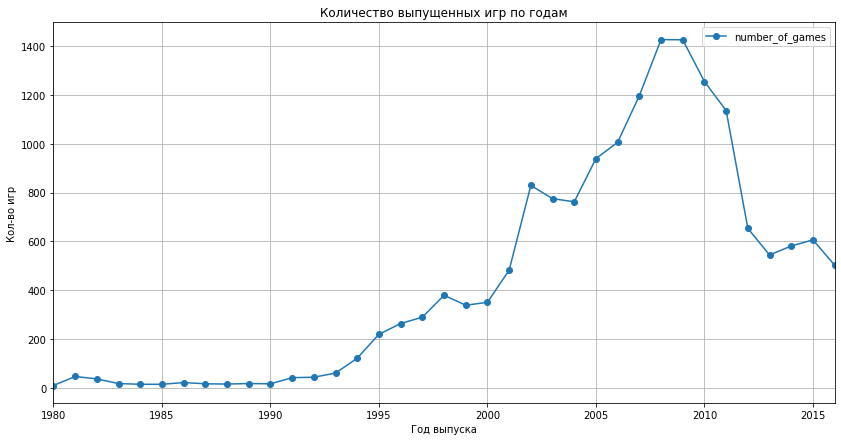

In [ ]:
df.groupby('year_of_release').agg(number_of_games = ('name', 'count')).plot(grid=True, style='o-', figsize=(14,7))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во игр')
plt.show()

До 1994 года игры практически не выпускали. Далее наблюдается рост кол-ва выпущенных игр в год, резкий скачок произошел в 2002 году. Пик рынка видеоигр - 2007-2010 годы. Далее наблюдается спад.

### Исследование суммарных продаж по платформам:

Платформы, на которых выпускалось наибольшее число игр:

In [ ]:
top_platforms_by_num_of_games = df.groupby('platform').agg(number_of_games = ('name', 'count')).sort_values(by='number_of_games', ascending = False).reset_index()
top_platforms_by_num_of_games

,platform,number_of_games
0,PS2,2161
1,DS,2151
2,PS3,1331
3,Wii,1320
4,X360,1262
5,PSP,1209
6,PS,1197
7,PC,974
8,XB,824
9,GBA,822


Платформы, с наибольшими продажами за все время наблюдения:

In [ ]:
top_platforms_by_sum_of_sales = df.groupby('platform')['total_sales'].agg('sum').sort_values(ascending = False).reset_index()
display(top_platforms_by_sum_of_sales)

,platform,total_sales
0,PS2,1062.33
1,X360,885.66
2,Wii,828.44
3,PS3,803.97
4,DS,746.86
5,PS,689.95
6,GBA,310.12
7,PS4,265.79
8,PSP,252.63
9,XB,249.02


In [ ]:
top_platforms_by_sum_of_sales['platform'].unique()

array(['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'XB',
       'GB', 'NES', '3DS', 'PC', 'N64', 'SNES', 'GC', 'XOne', '2600',
       'WiiU', 'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Напишем функцию для удобной визуализации данных по продажам на различных платформах:

In [ ]:
def sales_by_year(df, platforms, title):
    plt.figure(figsize=(20,11))
    plt.title(title)
    plt.xlabel('Год выпуска')
    plt.ylabel('Продажи, млн. копий')
    plt.grid()
    
    for platform in platforms: 
        df_for_plot = df[df['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
        plt.plot(df_for_plot, 'o-', label=platform)
    plt.legend()
    plt.show()

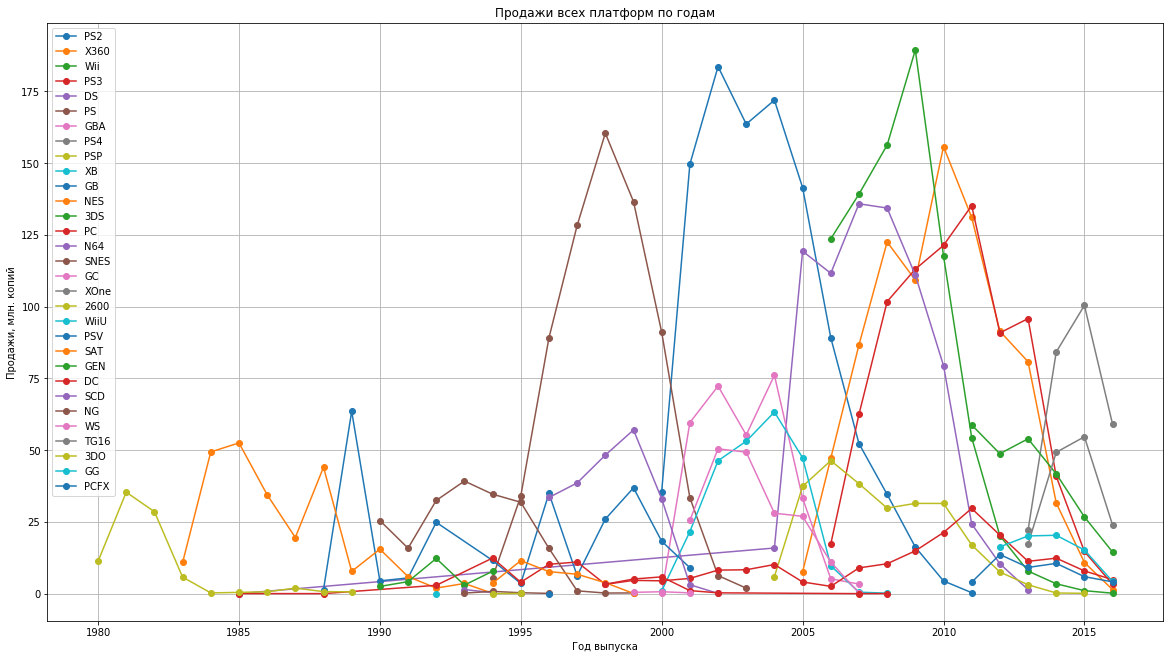

In [ ]:
sales_by_year(df, top_platforms_by_sum_of_sales['platform'].unique() ,'Продажи всех платформ по годам')

Далее выделим платформы с наибольшими суммарными продажами по годам (top 10):

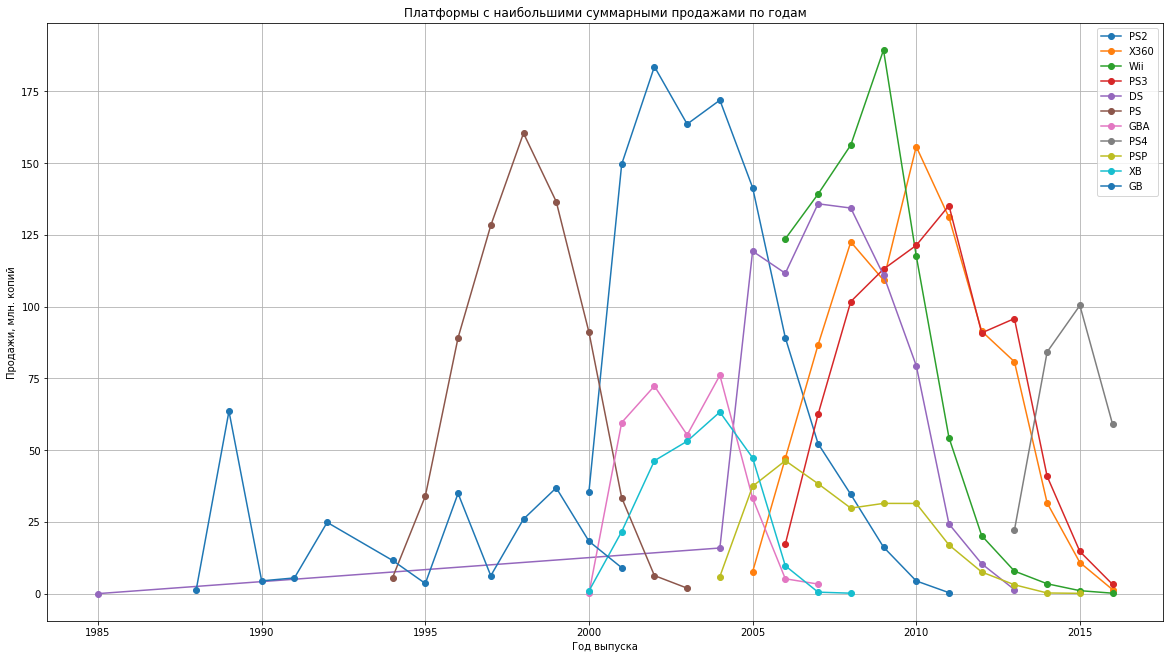

In [ ]:
sales_by_year(df, top_platforms_by_sum_of_sales['platform'].unique()[:11] ,'Платформы с наибольшими суммарными продажами по годам')

Выделим платформы со средними суммарными продажами по годам (top 16):

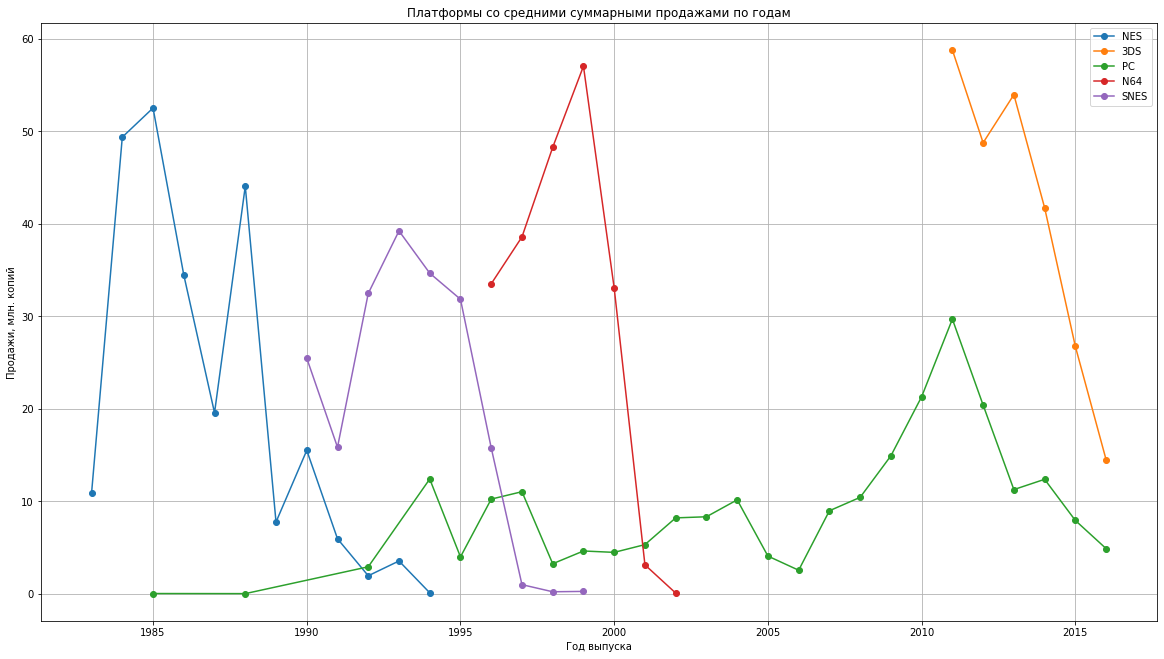

In [ ]:
sales_by_year(df, top_platforms_by_sum_of_sales['platform'].unique()[11:16] ,'Платформы со средними суммарными продажами по годам')

Выделим платформы с низкими суммарными продажами по годам:

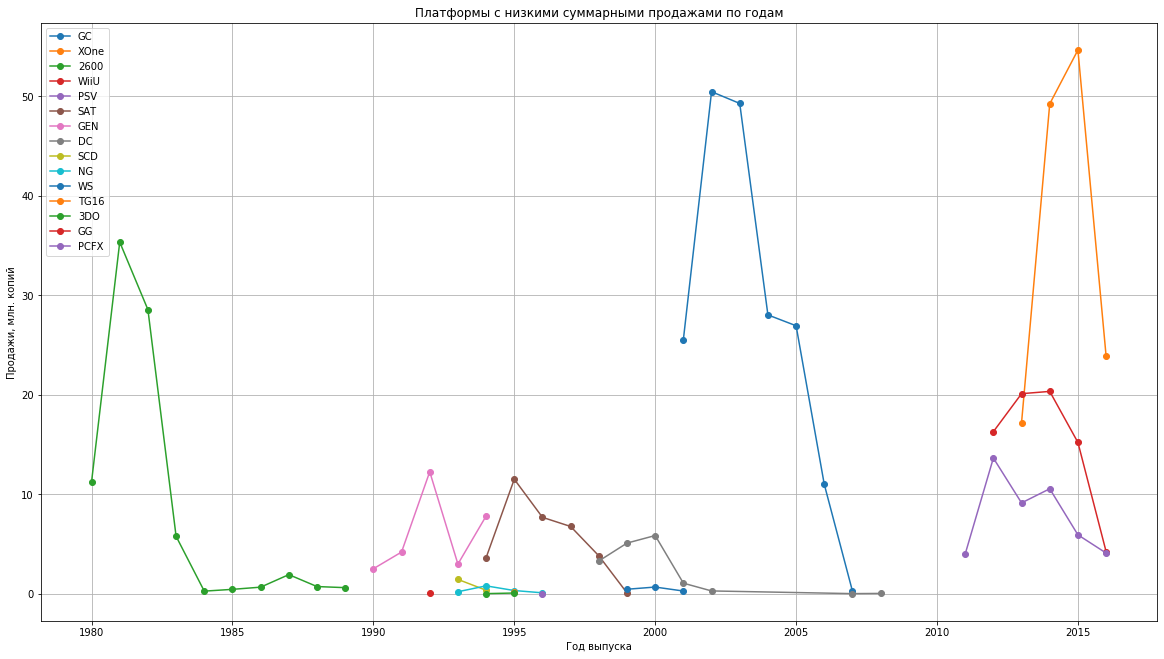

In [ ]:
sales_by_year(df, top_platforms_by_sum_of_sales['platform'].unique()[16:] ,'Платформы с низкими суммарными продажами по годам')

В данном пункте исследовательского анализа были построены графики распределения суммарных продаж по платформам.  
Исходя из графиков видно, что в среднем платформы существуют около 10 лет, после чего появляется новое поколение той же платформы, или на рынок выходят новые игроки.

### Выбор актуального периода для исследования:

In [ ]:
actual_df = df.query('2010 <= year_of_release <= 2015')

In [ ]:
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,20.13
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,17.09
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,14.86
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,-1,-1.0,non rated,14.33
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,13.41
...,...,...,...,...,...,...,...,...,...,...,...,...
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,-1,-1.0,T,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61,5.8,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60,7.2,E10+,0.01


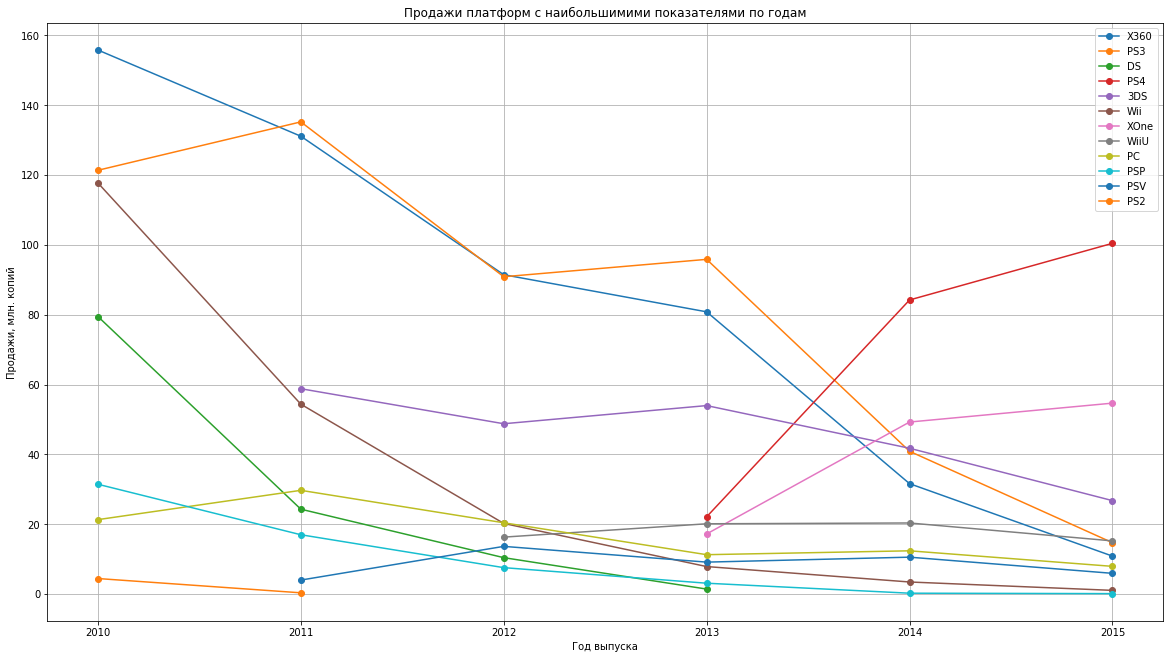

In [ ]:
sales_by_year(actual_df, actual_df['platform'].unique(),'Продажи платформ с наибольшимими показателями по годам')

Период с 2010 по 2015 год был выбран исходя из того, что в 2011 году появилась 3DS, в 2012 WiiU, а в 2013 появились PS4 и XOne. Все эти платформы интересуют нас для планирования кампании на 2017-й год.

### Выбор потенциально прибыльных платформ на 2017 год:

Потенциально прибыльные платформы на 2017-й год (см. пункт выше) - PS4, XOne, WiiU, 3DS и PC.

### Построение диаграмм размаха по глобальным продажам игр в разбивке по платформам:

In [ ]:
potential_platforms_2017 = actual_df.query('platform == "PS4" or platform == "XOne" or platform == "3DS" or platform == "WiiU" or platform == "PC"')

In [ ]:
platforms = potential_platforms_2017['platform'].unique()

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.


Обзор продаж платформы PS4

Диаграммы размаха:


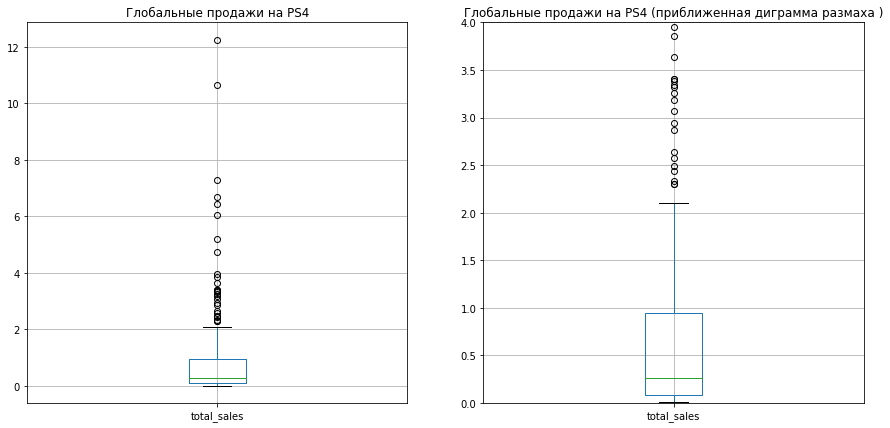

Описание данных по продажам PS4 методом .describe():


count    228.00000
mean       0.90693
std        1.59854
min        0.01000
25%        0.08750
50%        0.26500
75%        0.94250
max       12.25000
Name: total_sales, dtype: float64

----------------------------------------------------------


Обзор продаж платформы 3DS

Диаграммы размаха:


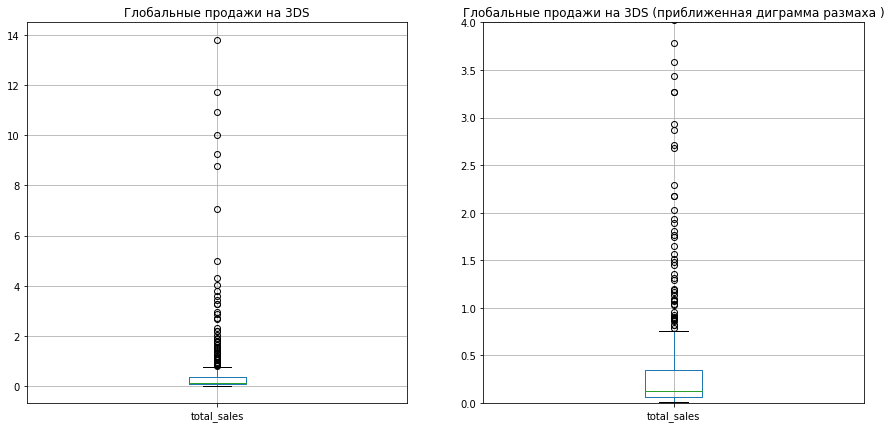

Описание данных по продажам 3DS методом .describe():


count    466.000000
mean       0.493648
std        1.387100
min        0.010000
25%        0.060000
50%        0.120000
75%        0.350000
max       13.820000
Name: total_sales, dtype: float64

----------------------------------------------------------


Обзор продаж платформы XOne

Диаграммы размаха:


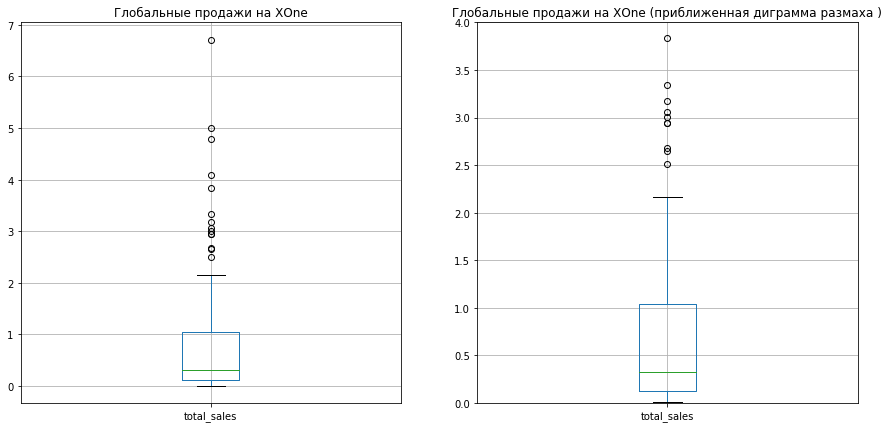

Описание данных по продажам XOne методом .describe():


count    160.000000
mean       0.757125
std        1.074818
min        0.010000
25%        0.120000
50%        0.320000
75%        1.040000
max        6.710000
Name: total_sales, dtype: float64

----------------------------------------------------------


Обзор продаж платформы WiiU

Диаграммы размаха:


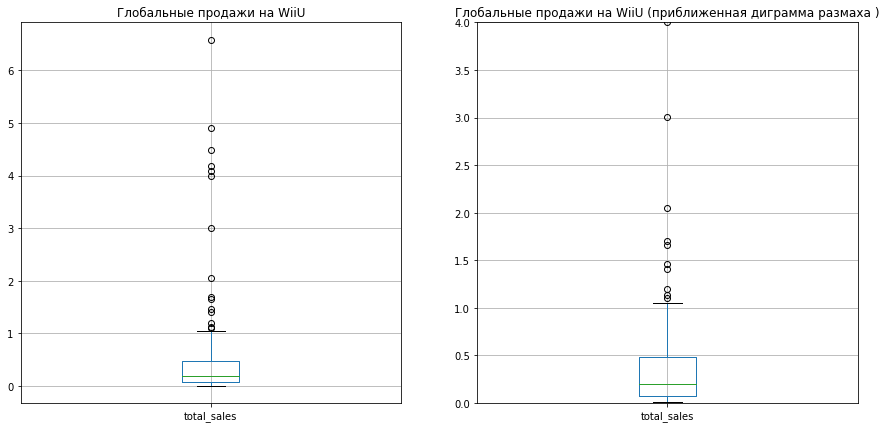

Описание данных по продажам WiiU методом .describe():


count    133.000000
mean       0.541278
std        1.028550
min        0.010000
25%        0.070000
50%        0.200000
75%        0.480000
max        6.580000
Name: total_sales, dtype: float64

----------------------------------------------------------


Обзор продаж платформы PC

Диаграммы размаха:


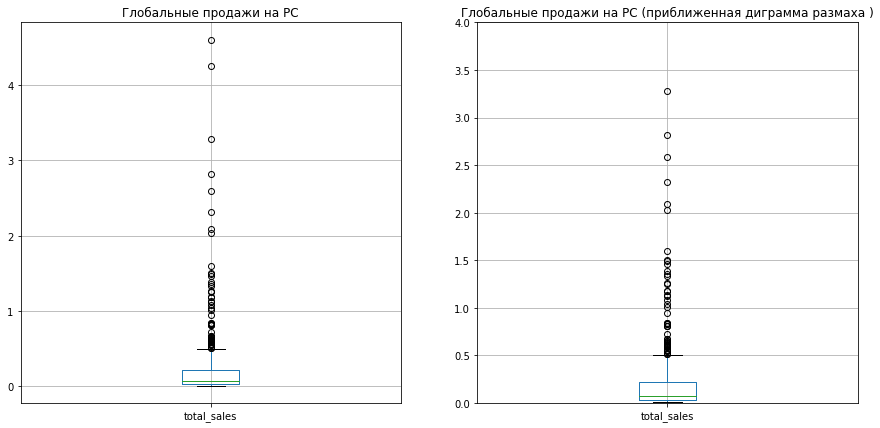

Описание данных по продажам PC методом .describe():


count    425.000000
mean       0.242353
std        0.491984
min        0.010000
25%        0.030000
50%        0.070000
75%        0.220000
max        4.600000
Name: total_sales, dtype: float64

----------------------------------------------------------



In [ ]:
for platform in platforms:
    print('')
    print('Обзор продаж платформы', platform)
    print('')
    print('Диаграммы размаха:')
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.title('Глобальные продажи на ' + platform)
    potential_platforms_2017[potential_platforms_2017['platform'] == platform].boxplot(column='total_sales', figsize=(10,5))
    plt.subplot(1, 2, 2)
    plt.title('Глобальные продажи на ' + platform + ' (приближенная диграмма размаха )')
    plt.ylim(0,4)
    potential_platforms_2017[potential_platforms_2017['platform'] == platform].boxplot(column='total_sales', figsize=(10,5))
    plt.show()
    print('Описание данных по продажам ' + platform + ' методом .describe():')
    display(potential_platforms_2017[potential_platforms_2017['platform'] == platform]['total_sales'].describe())
    print('----------------------------------------------------------')
    print('')

### Исследование влияния оценок критиков и пользователей на показатели продаж:    

In [ ]:
potential_platforms_2017.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5224,Fossil Fighters: Frontier,3DS,2014,Role-Playing,0.08,0.04,0.23,0.01,57,4.8,E10+,0.35
12538,JoJo's Bizarre Adventure: All Star Battle,3DS,2012,Fighting,0.06,0.00,0.00,0.00,-1,-1.0,non rated,0.06
7920,Reel Fishing Paradise 3D,3DS,2011,Sports,0.12,0.00,0.06,0.01,57,-1.0,E,0.18
1455,Tom Clancy's Rainbow Six: Siege,XOne,2015,Shooter,0.77,0.45,0.00,0.12,74,6.9,M,1.22
4494,Lego Batman 3: Beyond Gotham,XOne,2014,Action,0.23,0.17,0.00,0.04,74,7.1,E10+,0.40


Напишем функцию для более удобной визуализации влияния оценок критиков и пользователей на показатели продаж:

In [ ]:
def impact_of_scores_on_sales(df, platform, ymax):
    (df.query('platform == @platform')
     .pivot_table(index='user_score', values='total_sales', aggfunc='sum')
     .plot(grid=True, style='o', title='Зависимость продаж на '+platform+' от отзывов пользователей', figsize=(13, 6), xlim=0, ylim=(-1,ymax))
    )
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи, млн. копий')
    plt.show()
    
    print('Коэффициент корреляции Пирсона между параметрами user_score и total_sales :',
          df.query('platform == @platform')['user_score'].corr(df.query('platform == @platform')['total_sales']))
    print('')
    
    (potential_platforms_2017.query('platform == @platform')
     .pivot_table(index='critic_score', values='total_sales', aggfunc='sum')
     .plot(grid=True, style='o', title='Зависимость продаж на '+platform+' от отзывов критиков', figsize=(13, 6), xlim=0, ylim=(-1,ymax))
    )
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи, млн. копий')
    plt.show()
    
    print('Коэффициент корреляции Пирсона между параметрами critic_score и total_sales :',
          df.query('platform == @platform')['critic_score'].corr(df.query('platform == @platform')['total_sales']))
    

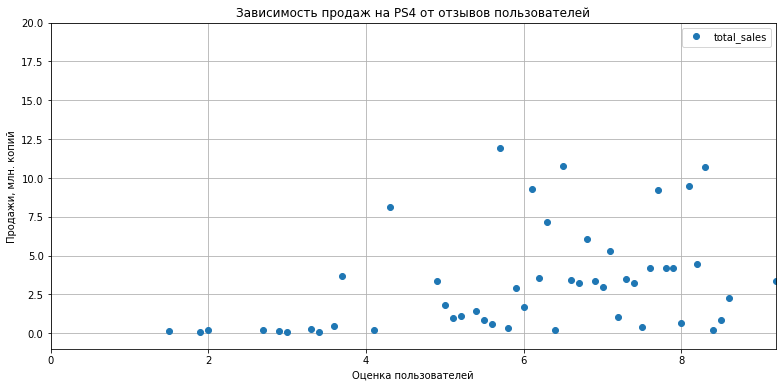

Коэффициент корреляции Пирсона между параметрами user_score и total_sales : 0.09904220870556323



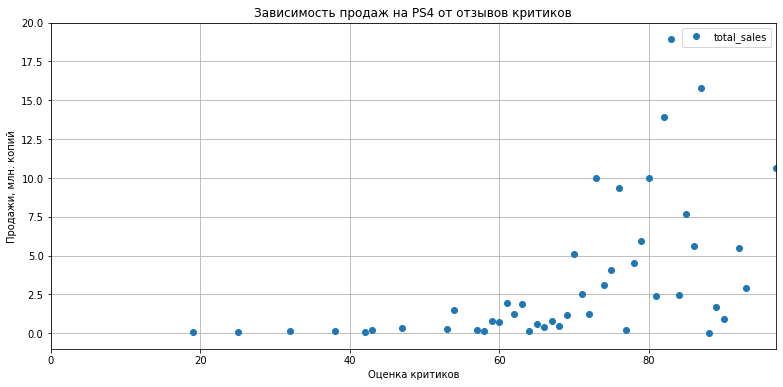

Коэффициент корреляции Пирсона между параметрами critic_score и total_sales : 0.2013051020882276


In [ ]:
impact_of_scores_on_sales(potential_platforms_2017, "PS4", 20)

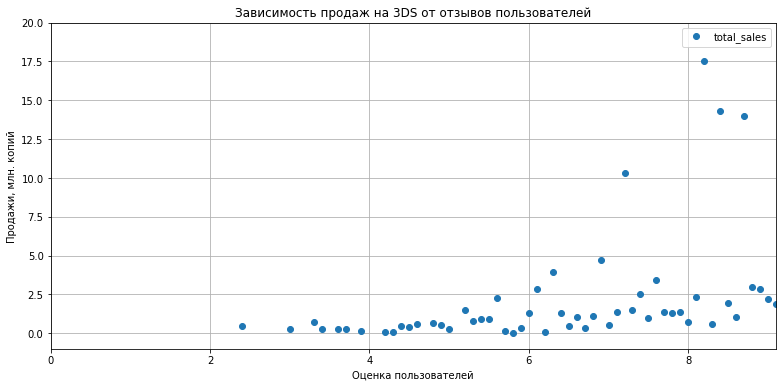

Коэффициент корреляции Пирсона между параметрами user_score и total_sales : 0.157365876547943



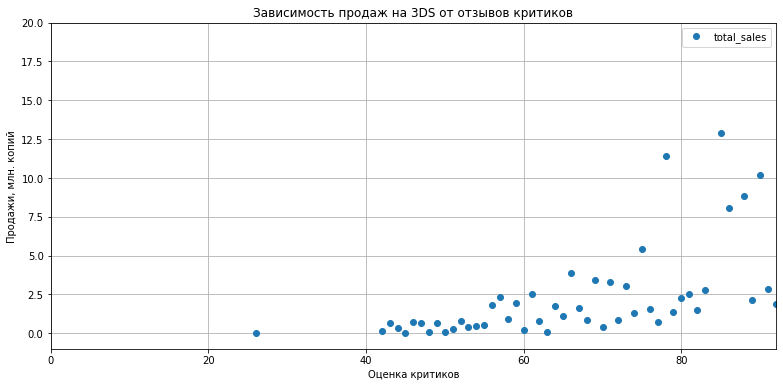

Коэффициент корреляции Пирсона между параметрами critic_score и total_sales : 0.17558122876862226


In [ ]:
impact_of_scores_on_sales(potential_platforms_2017, '3DS', 20)

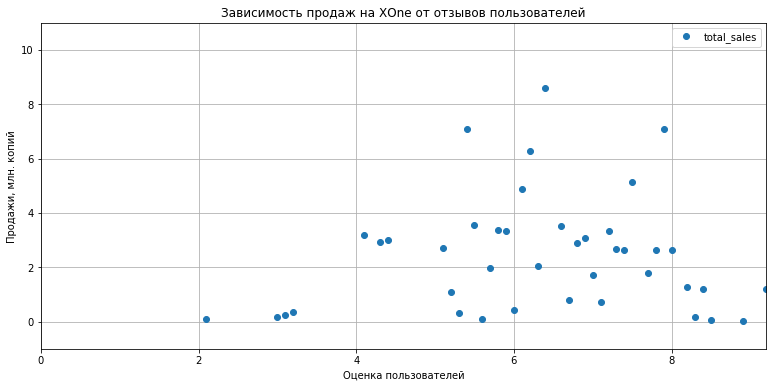

Коэффициент корреляции Пирсона между параметрами user_score и total_sales : 0.14683208761076116



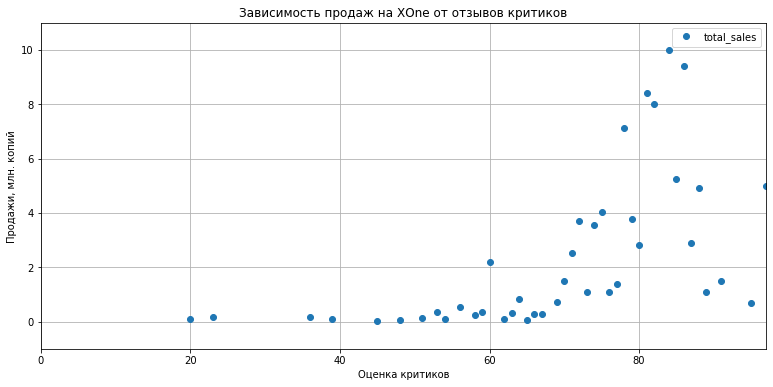

Коэффициент корреляции Пирсона между параметрами critic_score и total_sales : 0.28517621429898937


In [ ]:
impact_of_scores_on_sales(potential_platforms_2017, 'XOne', 11)

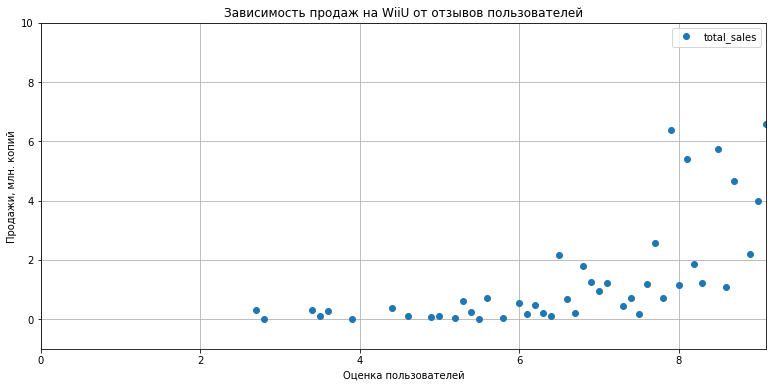

Коэффициент корреляции Пирсона между параметрами user_score и total_sales : 0.2668968108931364



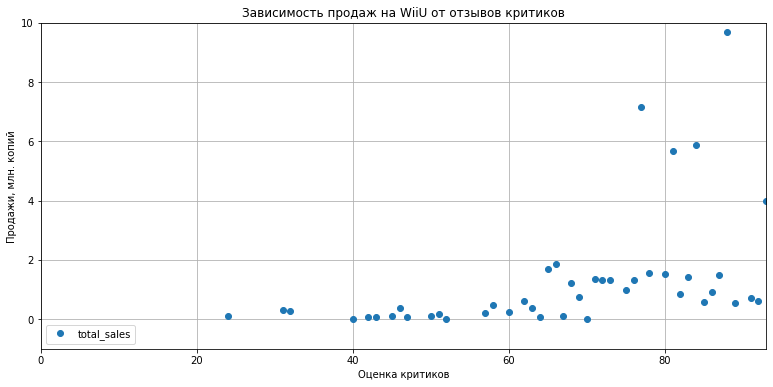

Коэффициент корреляции Пирсона между параметрами critic_score и total_sales : 0.30616565803232


In [ ]:
impact_of_scores_on_sales(potential_platforms_2017, 'WiiU', 10)

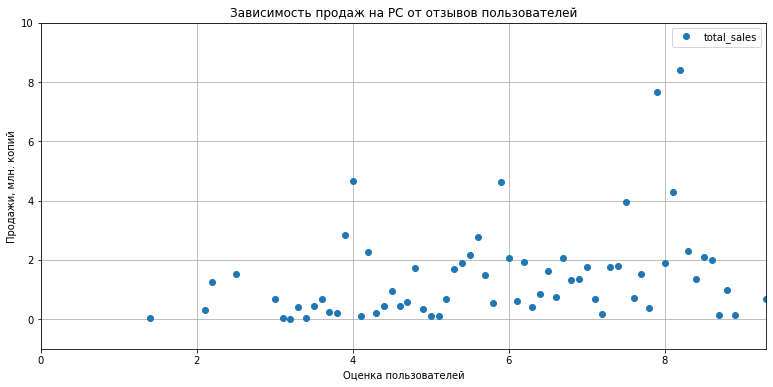

Коэффициент корреляции Пирсона между параметрами user_score и total_sales : 0.14035241309572177



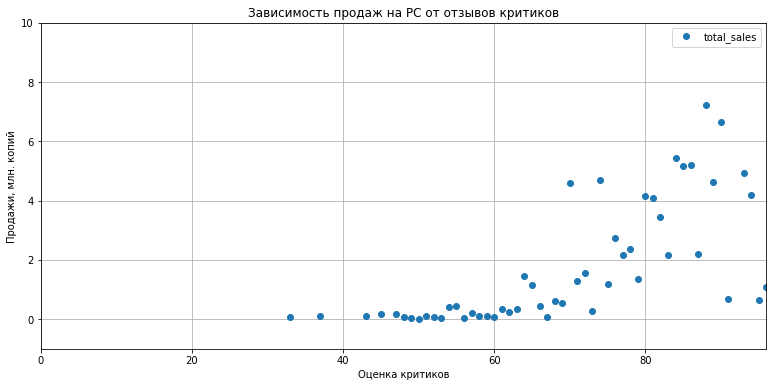

Коэффициент корреляции Пирсона между параметрами critic_score и total_sales : 0.27414621605762657


In [ ]:
impact_of_scores_on_sales(potential_platforms_2017, 'PC', 10)

Сильной зависимости между оценками критиков и пользоватей и продажами игр не было выявлено. Хотя чем выше оценка критиков, тем успешнее игра на рынке, что логично.

### Исследование общего распределения продаж игр по жанрам:

In [ ]:
most_profitable_genres = (potential_platforms_2017.groupby('genre')
                    .agg(count_of_games = ('platform', 'count'),
                        sum_of_sales = ('total_sales', 'sum'),
                        mean_of_sales = ('total_sales', 'mean'))
               .sort_values('mean_of_sales', ascending=False))

In [ ]:
most_profitable_genres

,count_of_games,sum_of_sales,mean_of_sales
genre,,,
Shooter,124,125.20,1.009677
Platform,55,55.31,1.005636
Role-Playing,178,128.09,0.719607
Racing,61,40.26,0.660000
Fighting,36,21.64,0.601111
Sports,114,67.62,0.593158
Simulation,78,39.63,0.508077
Action,457,183.16,0.400788
Misc,105,34.93,0.332667


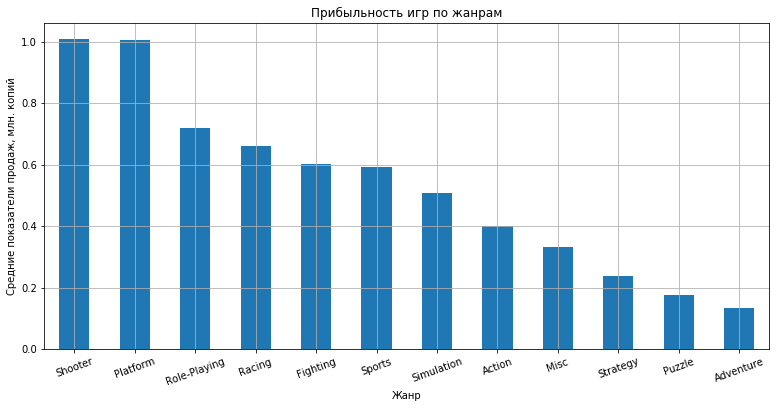

In [ ]:
most_profitable_genres['mean_of_sales'].plot(kind='bar', title='Прибыльность игр по жанрам', grid=True, figsize=(13, 6), rot=20)
plt.xlabel('Жанр')
plt.ylabel('Средние показатели продаж, млн. копий')
plt.show()

Самым прибыльным жанром игр являются шутеры. Далее идут платформеры и ролевые игры. Самые невостребованные игры - приключения, головоломки и стратегии.

### Вывод

В ходе исследовательского анализа данных были проведены следующие исследования:

* Исследование количества игр по годам
* Исследование суммарных продаж по платформам
* Исследование влияния оценок критиков и пользователей на показатели продаж:
* Исследование общего распределения продаж игр по жанрам:

А также:

* Был выбран актуальный период для исследования
* Были выбраны потенциально прибыльные платформы на 2017 год
* Были построены диаграммы размаха по глобальным продажам игр в разбивке по платформам

По каждому пункту исследовательского анализа данных были написаны выводы.


## Составление портрета пользователя из каждого региона

Считаю целесообразным рассмотреть 2 портрета пользователя из каждого региона по каждому из параметров. 
* Первый портрет составить на основании всех данных, чтобы ознакомиться с общим портретом пользователя каждого региона.
* Второй портрет составить на основании данных, которые были выбраны для планирования кампании на 2017-й год, для того, чтобы посмотреть на современный и релевантный портрет пользователя из каждого региона.

### Для всех данных:

#### Самые популярные платформы (топ-5):

In [ ]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15489,Agatha Christie: The ABC Murders,PC,2016,Adventure,0.00,0.02,0.00,0.00,66,8.5,non rated,0.02
12679,Nendoroid Generation,PSP,2012,Role-Playing,0.00,0.00,0.06,0.00,-1,-1.0,non rated,0.06
10238,Invizimals: The Lost Tribes,PSP,2011,Action,0.00,0.08,0.00,0.03,-1,-1.0,non rated,0.08
14237,Living Legends: Frozen Beauty,PC,2014,Action,0.00,0.03,0.00,0.00,-1,-1.0,non rated,0.03
5430,Pirates of the Caribbean: At World's End,X360,2007,Action,0.29,0.02,0.00,0.03,58,5.3,T,0.31


Напишем функцию для удобной визуализации данных по продажам на самых популярных платформах в определенном регионе:

In [ ]:
def most_popular_platforms_in_region(df, region):
    region_platforms = (df.groupby('platform')
                    .agg(
                        count_of_games = (region, 'count'),
                        sum_of_sales = (region, 'sum'),
                        mean_of_sales = (region, 'mean'))
                     )
    
    most_popular_region_platforms = region_platforms.sort_values('sum_of_sales', ascending=False).head(5)
    display(most_popular_region_platforms)
    
    most_popular_region_platforms['sum_of_sales'].plot(kind='bar', title='Продажи по различным платформам', grid=True, figsize=(13, 6), rot=20)
    plt.xlabel('Платформа')
    plt.ylabel('Продажи, млн. копий')
    plt.show()   

,count_of_games,sum_of_sales,mean_of_sales
platform,,,
X360,1262,602.47,0.477393
PS2,2161,583.84,0.270171
Wii,1320,496.90,0.376439
PS3,1331,393.49,0.295635
DS,2151,382.40,0.177778


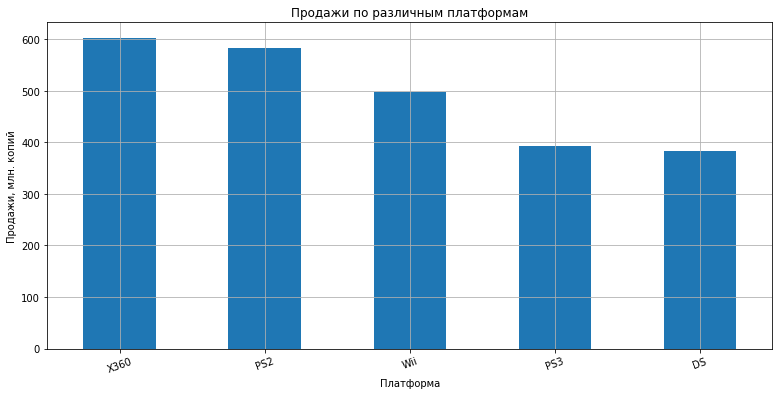

In [ ]:
most_popular_platforms_in_region(df, 'na_sales')

,count_of_games,sum_of_sales,mean_of_sales
platform,,,
PS2,2161,339.29,0.157006
PS3,1331,330.29,0.248152
X360,1262,270.76,0.214548
Wii,1320,262.21,0.198644
PS,1197,213.61,0.178454


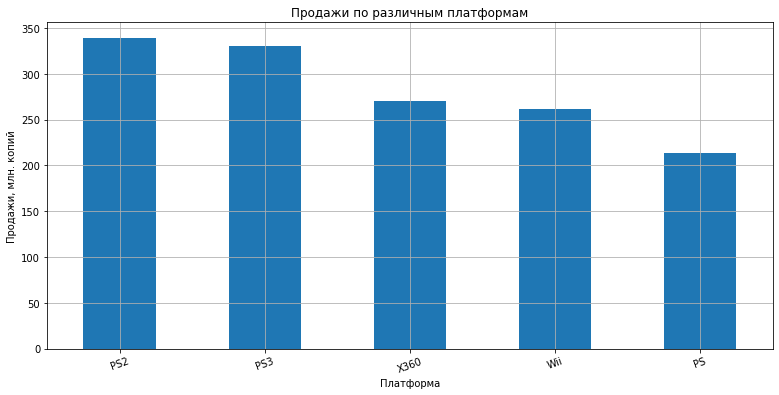

In [ ]:
most_popular_platforms_in_region(df, 'eu_sales')

,count_of_games,sum_of_sales,mean_of_sales
platform,,,
DS,2151,175.57,0.081623
PS,1197,139.82,0.116809
PS2,2161,139.20,0.064415
SNES,239,116.55,0.487657
3DS,520,100.67,0.193596


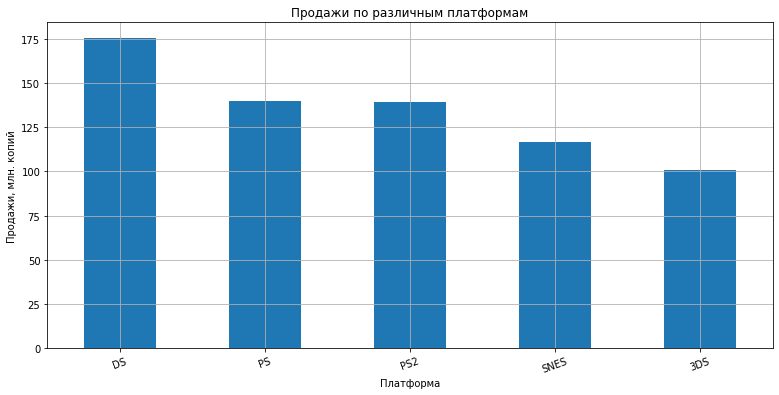

In [ ]:
most_popular_platforms_in_region(df, 'jp_sales')

За все время наблюдений:

* В Северной Америке самыми популярными платформами являются X360, PS2, Wii, PS3 и DS.
* В Европе самыми популярными платформами являются PS2, PS3, X360, Wii, PS3 и PS.
* В Японии самыми популярными платформами являются DS, PS, PS2, SNES и 3DS.

#### Самые популярные жанры (топ-5):

Напишем функцию для удобной визуализации данных по продажам самых популярных жанров в определенном регионе:

In [ ]:
def most_popular_genres_in_region(df, region):
    region_genres = (df.groupby('genre')
                    .agg(
                        count_of_games = (region, 'count'),
                        sum_of_sales = (region, 'sum'),
                        mean_of_sales = (region, 'mean'))
                     )
    
    most_popular_region_genres = region_genres.sort_values('sum_of_sales', ascending=False).head(5)
    display(most_popular_region_genres)
    
    
    most_popular_region_genres['sum_of_sales'].plot(kind='bar', title='Продажи по платформам, млн. копий', grid=True, figsize=(13, 6), rot=20)
    plt.xlabel('Жанр')
    plt.ylabel('Продажи, млн. копий')
    plt.show()
    

,count_of_games,sum_of_sales,mean_of_sales
genre,,,
Action,3369,879.01,0.260911
Sports,2348,684.43,0.291495
Shooter,1323,592.24,0.447649
Platform,888,445.50,0.501689
Misc,1750,407.27,0.232726


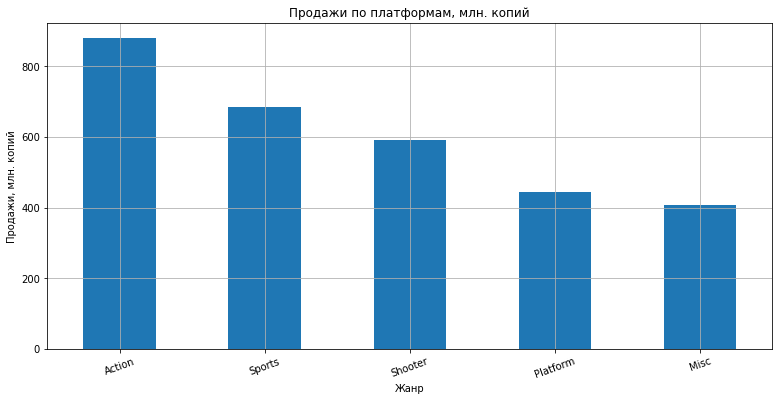

In [ ]:
most_popular_genres_in_region(df, 'na_sales')

,count_of_games,sum_of_sales,mean_of_sales
genre,,,
Action,3369,519.13,0.154090
Sports,2348,376.79,0.160473
Shooter,1323,317.34,0.239864
Racing,1249,236.51,0.189359
Misc,1750,212.74,0.121566


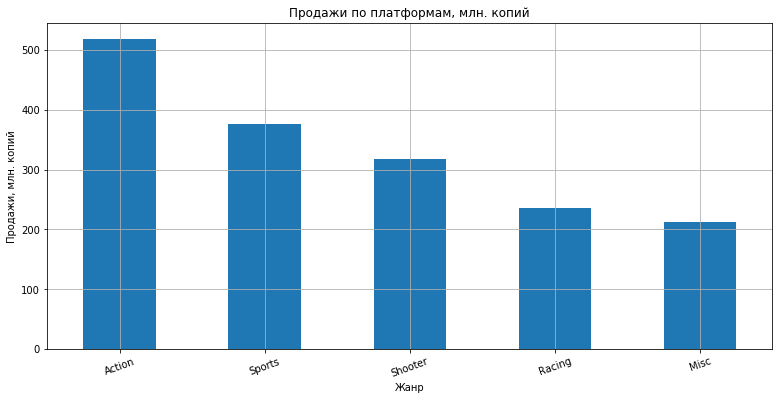

In [ ]:
most_popular_genres_in_region(df, 'eu_sales')

,count_of_games,sum_of_sales,mean_of_sales
genre,,,
Role-Playing,1498,355.41,0.237256
Action,3369,161.43,0.047916
Sports,2348,135.54,0.057726
Platform,888,130.83,0.147331
Misc,1750,108.11,0.061777


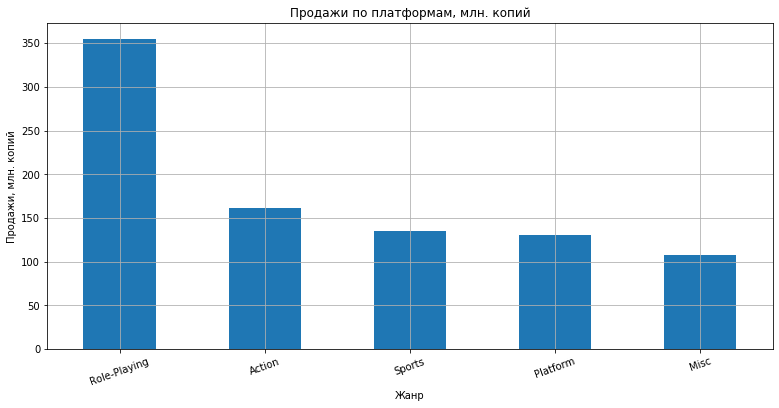

In [ ]:
most_popular_genres_in_region(df, 'jp_sales')

За все время наблюдений:

* В Северной Америке и Европе самыми популярными жанрами являются Экшен, Спортивные, Шутеры, Гонки и внежанровые игры.
* В Японии самыми популярными жанрами являются Ролевые, Экшен, Спортивные, Платформеры и внежанровые игры.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
df['rating'].unique()

array(['E', 'non rated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [ ]:
df['rating'].value_counts()

non rated    6766
E            3990
T            2961
M            1563
E10+         1420
EC              8
K-A             3
RP              3
AO              1
Name: rating, dtype: int64

Добавим в датафрейм столбец с описанием каждого рейтинга, для упрощения анализа результатов:

In [ ]:
def decryption_rating(row):
    rating = row['rating']
    
    if rating == 'non rated':
        return 'non rated'
    elif rating == 'M':
        return '17+'
    elif rating == 'E':
        return '6+'
    elif rating == 'T':
        return '13+'
    elif rating == 'E10+':
        return '10+'
    elif rating == 'EC':
        return '3+'
    elif rating == 'RP':
        return 'waiting'
    elif rating == 'K-A':
        return '6+'
    elif rating == 'AO':
        return '18+'
    else:
        return 'другой'
    
df['ESRB_decryption'] = df.apply(decryption_rating, axis=1)

Проверка данных:

In [ ]:
df['ESRB_decryption'].value_counts()

non rated    6766
6+           3993
13+          2961
17+          1563
10+          1420
3+              8
waiting         3
18+             1
Name: ESRB_decryption, dtype: int64

Напишем функцию для удобной визуализации данных о зависимости оценок критиков и пользователей и суммарных продаж в определенном регионе:

In [ ]:
def impact_of_ESRB_on_sales(df, region):
    rating_ESRB_in_region = (df
                        .query('ESRB_decryption != "non rated" and ESRB_decryption != "waiting"')
                        .groupby('ESRB_decryption')
                        .agg(
                        count = (region, 'count'),
                        rating_sum = (region, 'sum'),
                        rating_mean = (region, 'mean'))
                     )
    
    best_ESRB_rating_in_region = rating_ESRB_in_region.sort_values('rating_sum', ascending=False)
    display(best_ESRB_rating_in_region)
    
    best_ESRB_rating_in_region['rating_sum'].plot(style='o-', title='Продажи по платформам, млн. копий', grid=True, figsize=(13, 6))
    plt.xlabel('Рейтинг ESRB')
    plt.ylabel('Продажи, млн. копий')
    plt.show()

,count,rating_sum,rating_mean
ESRB_decryption,,,
6+,3993,1295.55,0.324455
13+,2961,759.75,0.256586
17+,1563,748.48,0.478874
10+,1420,353.32,0.248817
3+,8,1.53,0.191250
18+,1,1.26,1.260000


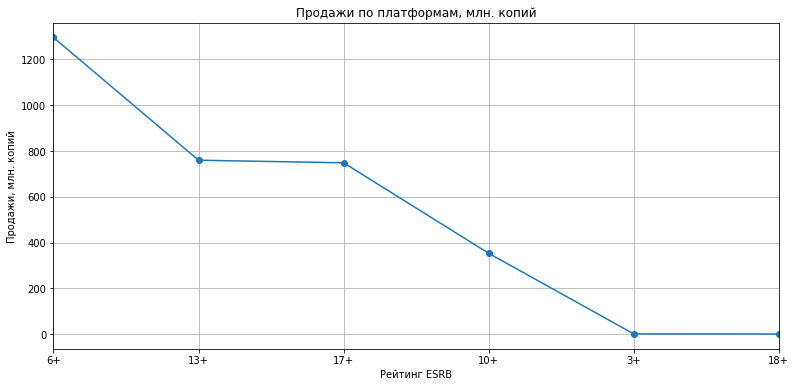

In [ ]:
impact_of_ESRB_on_sales(df, 'na_sales')

,count,rating_sum,rating_mean
ESRB_decryption,,,
6+,3993,710.52,0.177941
17+,1563,483.97,0.309642
13+,2961,427.03,0.144218
10+,1420,188.52,0.132761
18+,1,0.61,0.610000
3+,8,0.11,0.013750


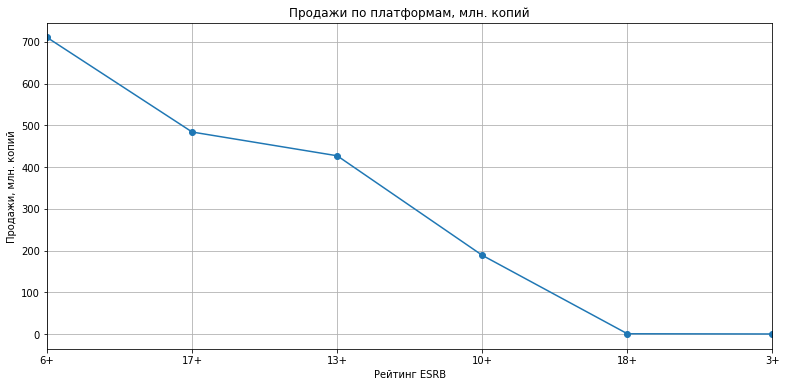

In [ ]:
impact_of_ESRB_on_sales(df, 'eu_sales')

,count,rating_sum,rating_mean
ESRB_decryption,,,
6+,3993,199.57,0.049980
13+,2961,151.40,0.051131
17+,1563,64.24,0.041100
10+,1420,40.20,0.028310
18+,1,0.00,0.000000
3+,8,0.00,0.000000


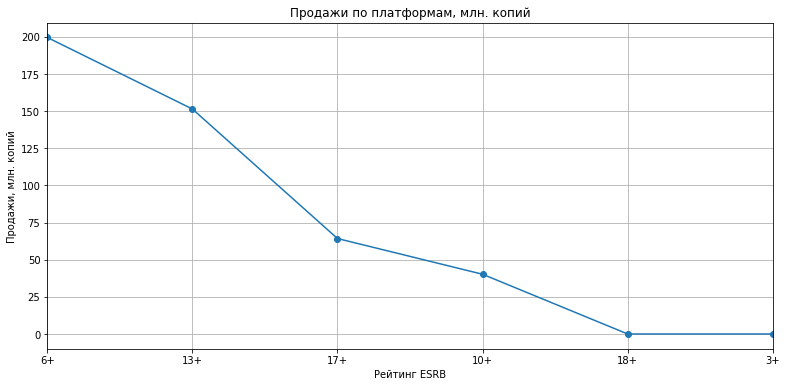

In [ ]:
impact_of_ESRB_on_sales(df, 'jp_sales')

За все время наблюдений во всех представленных странах схожая картина: наиболее продаваемые игры - это игры 6+, далее идут игры с рейтингом 13+ и 17+, наименее продаваемые игры - это игры с рейтингами 10+, 18+ и 3+.

### Для данных, которые помогут сделать прогноз на 2017 год:

#### Самые популярные платформы (топ-5):

In [ ]:
potential_platforms_2017.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4736,Call of Duty: Advanced Warfare,PC,2014,Shooter,0.15,0.23,0.0,0.03,78,4.5,M,0.38
1055,The Sims 3: Late Night Expansion Pack,PC,2010,Simulation,0.59,0.87,0.0,0.23,74,5.3,T,1.46
14003,Worms: Ultimate Mayhem,PC,2011,Strategy,0.00,0.03,0.0,0.00,66,7.8,E10+,0.03
2151,The Witcher 2: Assassins of Kings,PC,2011,Action,0.25,0.56,0.0,0.14,88,8.5,M,0.81
13597,Nobunaga's Ambition: Sphere of Influence,PS4,2014,Strategy,0.03,0.00,0.0,0.01,80,8.1,T,0.03


,count_of_games,sum_of_sales,mean_of_sales
platform,,,
PS4,228,87.25,0.382675
XOne,160,78.85,0.492812
3DS,466,78.51,0.168476
PC,425,37.71,0.088729
WiiU,133,36.00,0.270677


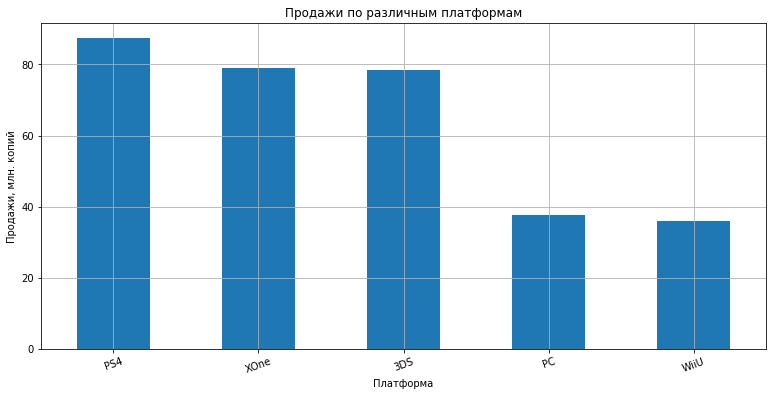

In [ ]:
most_popular_platforms_in_region(potential_platforms_2017, 'na_sales')

,count_of_games,sum_of_sales,mean_of_sales
platform,,,
PS4,228,109.31,0.479430
PC,425,65.29,0.153624
3DS,466,58.94,0.126481
XOne,160,41.96,0.262250
WiiU,133,23.65,0.177820


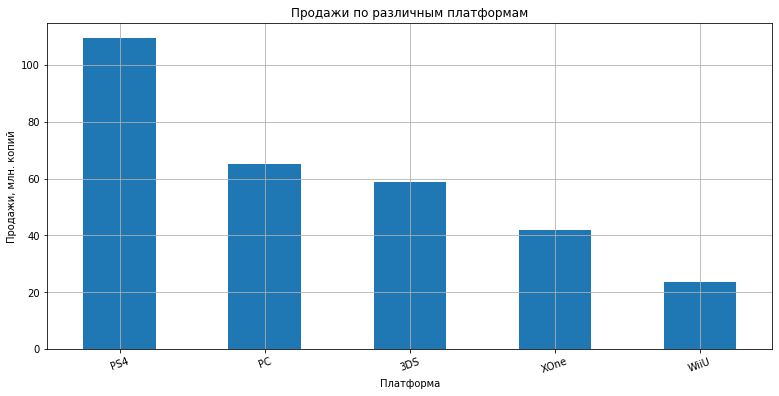

In [ ]:
most_popular_platforms_in_region(potential_platforms_2017, 'eu_sales')

,count_of_games,sum_of_sales,mean_of_sales
platform,,,
3DS,466,92.59,0.198691
WiiU,133,12.34,0.092782
PS4,228,10.22,0.044825
XOne,160,0.33,0.002063
PC,425,0.00,0.000000


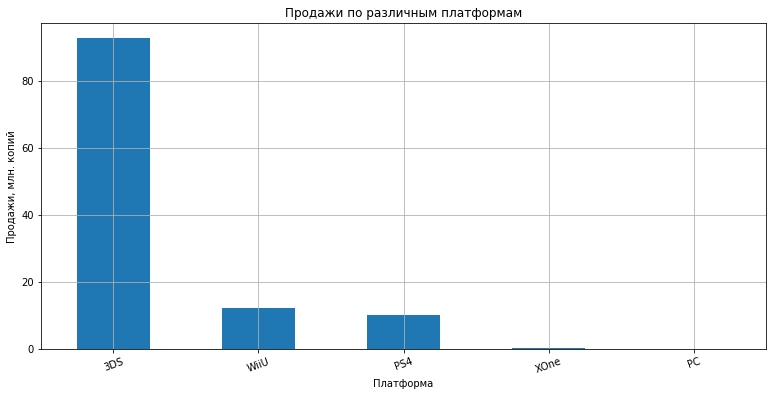

In [ ]:
most_popular_platforms_in_region(potential_platforms_2017, 'jp_sales')

За интересующий нас период наблюдений (2010 - 2015):

* В Северной Америке самыми популярными платформами являются PS4, XOne, 3DS, PC и WiiU.
* В Европе самыми популярными платформами являются PS4, PC, 3DS, XOne и WiiU.
* В Японии самыми популярными платформами являются 3DS, WiiU, PS4, XOne и PC.

#### Самые популярные жанры (топ-5):

,count_of_games,sum_of_sales,mean_of_sales
genre,,,
Action,457,81.76,0.178906
Shooter,124,64.60,0.520968
Role-Playing,178,47.42,0.266404
Sports,114,31.95,0.280263
Platform,55,24.97,0.454000


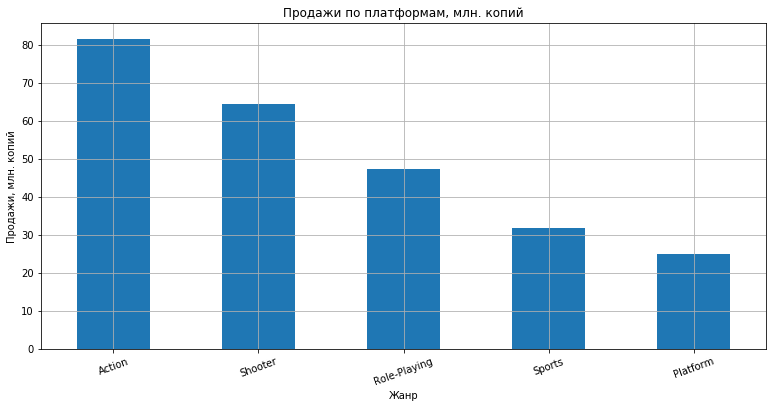

In [ ]:
most_popular_genres_in_region(potential_platforms_2017, 'na_sales')

,count_of_games,sum_of_sales,mean_of_sales
genre,,,
Action,457,76.90,0.168271
Shooter,124,56.95,0.459274
Role-Playing,178,39.50,0.221910
Sports,114,32.65,0.286404
Platform,55,19.80,0.360000


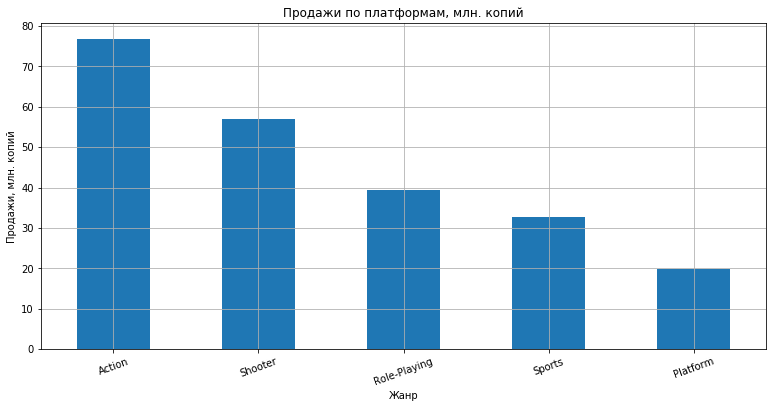

In [ ]:
most_popular_genres_in_region(potential_platforms_2017, 'eu_sales')

,count_of_games,sum_of_sales,mean_of_sales
genre,,,
Role-Playing,178,41.17,0.231292
Action,457,24.50,0.053611
Platform,55,10.54,0.191636
Simulation,78,10.25,0.131410
Misc,105,7.72,0.073524


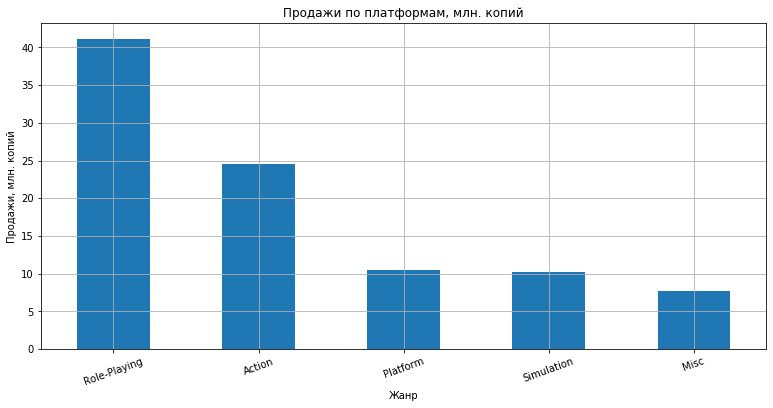

In [ ]:
most_popular_genres_in_region(potential_platforms_2017, 'jp_sales')

За интересующий нас период наблюдений (2010 - 2015):

* В Северной Америке и Европе самыми популярными жанрами являются Экшен, Шутеры, Ролевые, Спортивные и Платформеры.
* В Японии самыми популярными жанрами являются Ролевые, Экшен, Платформеры, Симуляторы и внежанровые игры.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
potential_platforms_2017['rating'].unique()

array(['non rated', 'E', 'M', 'T', 'E10+', 'EC', 'RP'], dtype=object)

In [ ]:
potential_platforms_2017['rating'].value_counts()

non rated    523
M            243
E            230
T            226
E10+         187
EC             2
RP             1
Name: rating, dtype: int64

Добавим в датафрейм столбец с описанием каждого рейтинга, для упрощения анализа результатов:

In [ ]:
potential_platforms_2017['ESRB_decryption'] = potential_platforms_2017.apply(decryption_rating, axis=1)

Проверка данных:

In [ ]:
potential_platforms_2017['ESRB_decryption'].value_counts()

non rated    523
17+          243
6+           230
13+          226
10+          187
3+             2
waiting        1
Name: ESRB_decryption, dtype: int64

,count,rating_sum,rating_mean
ESRB_decryption,,,
17+,243,94.18,0.387572
6+,230,72.01,0.313087
10+,187,41.43,0.221551
13+,226,41.11,0.181903
3+,2,0.09,0.045000


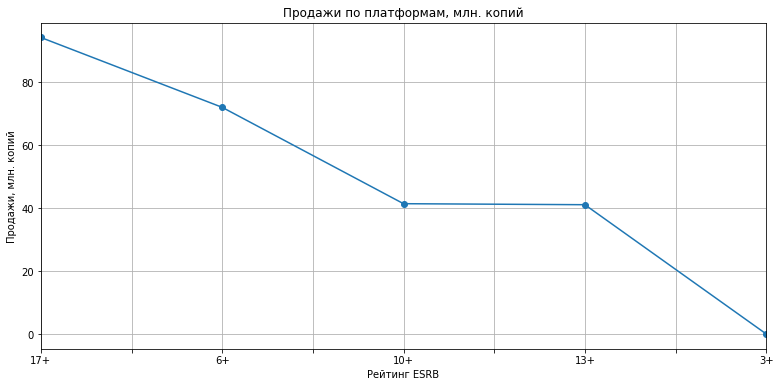

In [ ]:
impact_of_ESRB_on_sales(potential_platforms_2017, 'na_sales')

,count,rating_sum,rating_mean
ESRB_decryption,,,
17+,243,97.08,0.399506
6+,230,67.91,0.295261
13+,226,37.70,0.166814
10+,187,29.69,0.158770
3+,2,0.00,0.000000


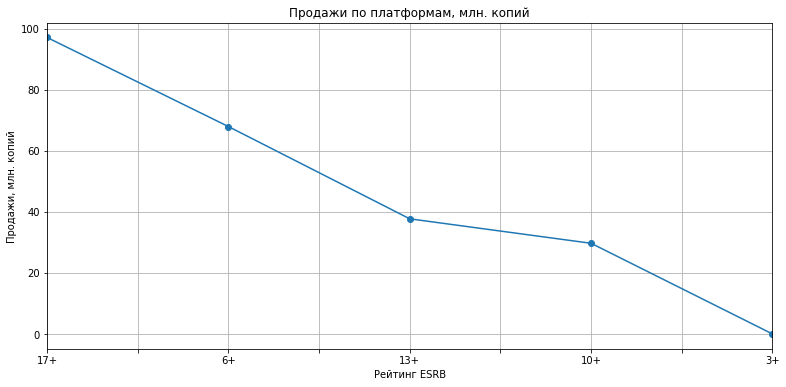

In [ ]:
impact_of_ESRB_on_sales(potential_platforms_2017, 'eu_sales')

,count,rating_sum,rating_mean
ESRB_decryption,,,
6+,230,28.36,0.123304
13+,226,8.74,0.038673
10+,187,7.62,0.040749
17+,243,6.16,0.025350
3+,2,0.00,0.000000


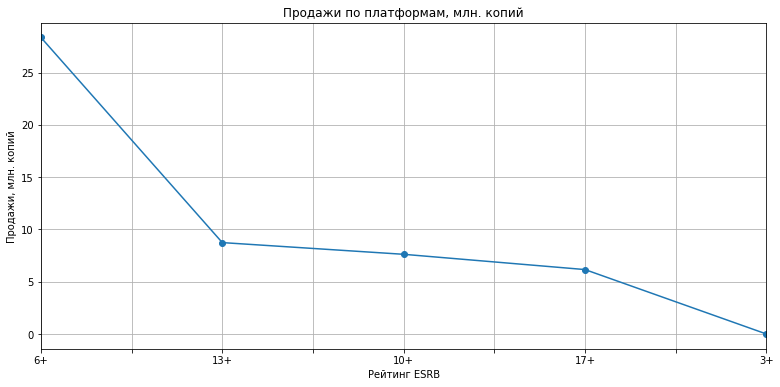

In [ ]:
impact_of_ESRB_on_sales(potential_platforms_2017, 'jp_sales')

За интересующий нас период наблюдений (2010 - 2015):

* В Северной Америке и Европе наиболее продаваемые игры - это игры с рейтингом 17+ и 6+, далее идут игры с рейтингом 13+ и 10+, наименее продаваемые игры - это игры с рейтингом 3+.
* В Японии самыми наиболее продаваемые игры - это игры с рейтингом 6+ и 13+, далее идут игры с рейтингом 10+ и 17+, наименее продаваемые игры - это игры с рейтингом 3+.

### Вывод

В данной части проекта были составлены 2 портрета пользователя из каждого региона по каждому из параметров (за весь период наблюдений и за интересующий нас период, который поможет спланировать кампанию на 2017 год).

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

Нулевая гипотеза (Н0) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза (Н1) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [ ]:
xone_user_rating = df.query('platform == "XOne" and user_score >= 0')['user_score'].values
pc_user_rating = df.query('platform == "PC" and user_score >= 0')['user_score'].values

xone_dispersion = np.var(xone_user_rating, ddof=1)
pc_dispersion = np.var(pc_user_rating, ddof=1)

print('Сравнение дисперсий выборок:')
print('Дисперсия выборки по XOne:', xone_dispersion)
print('Дисперсия выборки по PC:', pc_dispersion)
print('')
print('-----------')
print('')

#Проверка гипотезы:

alpha = 0.05 

results = st.ttest_ind(xone_user_rating, pc_user_rating, equal_var=False)

print('p-значение:', results.pvalue)
print('')
print('Результат:')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Сравнение дисперсий выборок:
Дисперсия выборки по XOne: 1.9069968429360695
Дисперсия выборки по PC: 2.3407871413372066

-----------

p-значение: 4.935072360183565e-06

Результат:
Отвергаем нулевую гипотезу


Отклоняем нулевую гипотезу.  
Средние пользовательские рейтинги платформ Xbox One и PC различаются между собой. Ради интереса сравним эти средние пользовательские рейтинги в наших данных.

In [ ]:
print(xone_user_rating.mean())
print(pc_user_rating.mean())

6.521428571428572
7.062467532467533


### Средние пользовательские рейтинги жанров Action и Sports разные:

Нулевая гипотеза (Н0) - средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Альтернативная гипотеза (Н1) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [ ]:
action_user_rating = potential_platforms_2017.query('genre == "Action" and user_score >= 0')['user_score'].values
sports_user_rating = potential_platforms_2017.query('genre == "Sports" and user_score >= 0')['user_score'].values

action_dispersion = np.var(action_user_rating, ddof=1)
sports_dispersion = np.var(sports_user_rating, ddof=1)

print('Сравнение дисперсий выборок:')
print('Дисперсия выборки по Action:', action_dispersion)
print('Дисперсия выборки по Sports:', sports_dispersion)
print('')
print('-----------')
print('')

#Проверка гипотезы:

alpha = 0.05

results = st.ttest_ind(action_user_rating, sports_user_rating, equal_var=False)

print('p-значение:', results.pvalue)
print('')
print('Результат:')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Сравнение дисперсий выборок:
Дисперсия выборки по Action: 1.7349042889641013
Дисперсия выборки по Sports: 2.6223576583801123

-----------

p-значение: 4.9275353723419336e-09

Результат:
Отвергаем нулевую гипотезу


Отклоняем нулевую гипотезу.  
Средние пользовательские рейтинги жанров Action и Sports различаются между собой. Ради интереса сравним эти средние пользовательские рейтинги в наших данных.

In [ ]:
print(action_user_rating.mean())
print(sports_user_rating.mean())

6.782156133828996
5.579310344827586


### Вывод

В рамках статистического анализа данных были проверены 2 гипотезы.  
В обоих случаях нулевая гипотеза была отклонена.

## Вывод

Планируя рекламную кампанию на 2017 год, стоит уделить особое внимание играм с следующими параметрами:

Платформы:

* PS4. - Появилась недавно (2013 г). Прибавляет в показателях продаж каждый год. Популярна во всех странах.
* Xbox One. - Появилась недавно (2013 г). Прибавляет в показателях продаж каждый год. Популярна в Америке и Европе.

Жанры: 

* Shooter	
* Platform	
* Role-Playing	
* Racing	
* Fighting

Если мы ориентируемся на рынки Европы и Северной Америки, то следует обратить внимание на игры с рейтингом М (17+).  
Сильной зависимости между оценками критиков/пользоватей и продажами игр не было выявлено.